In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

`scipy` has various useful methods for the gaussian (normal) PDF.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [2]:
# Let's define an x-axis from [0,6]
x = np.arange(0.0, 6.1, 0.1)

In [3]:
mu = 3.0
# three different values of sigma
gaussPDF1 = stats.norm.pdf(x, mu, 1.0)
gaussPDF2 = stats.norm.pdf(x, mu, 0.7)
gaussPDF3 = stats.norm.pdf(x, mu, 0.35)

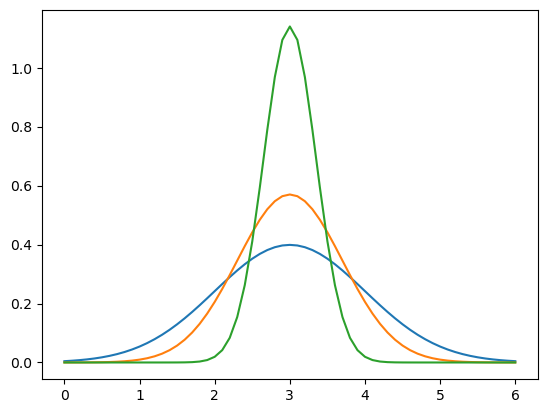

In [4]:
plt.plot(x,gaussPDF1)
plt.plot(x,gaussPDF2)
plt.plot(x,gaussPDF3)

In [5]:
# and their corresponding CDFs
gaussCDF1 = stats.norm.cdf(x, mu, 1.0)
gaussCDF2 = stats.norm.cdf(x, mu, 0.7)
gaussCDF3 = stats.norm.cdf(x, mu, 0.35)

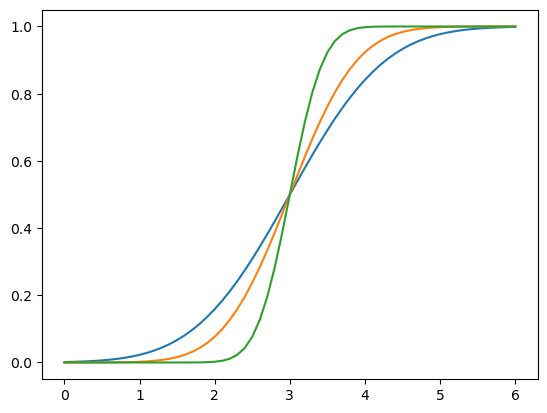

In [6]:
plt.plot(x, gaussCDF1)
plt.plot(x, gaussCDF2)
plt.plot(x, gaussCDF3)

The gaussian CDF can be written in terms of the error function `scipy.special.erf`.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erf.html

$$F(x) = \frac{1}{2}\left[1+\mathrm{erf}\left(\frac{x-\mu}{\sigma\sqrt{2}}\right)\right]$$

In [7]:
from scipy import special

In [8]:
mu  = 3.0
sig = 1.0
gaussCDFerf = 0.5*(1+special.erf((x-mu)/(sig*np.sqrt(2))))

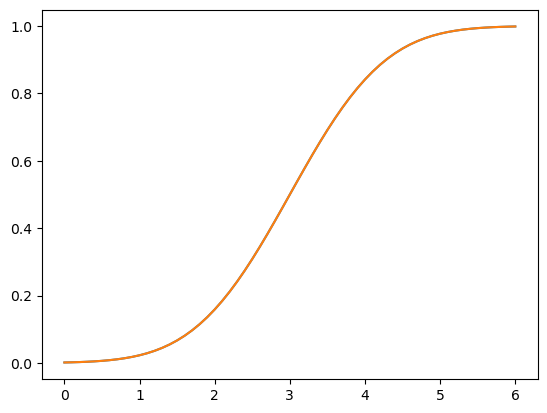

In [9]:
plt.plot(x, gaussCDF1)
plt.plot(x, gaussCDFerf)

You can use the CDF to calculate the probability contained inside a certain range of $x$.

In [10]:
mu  = 8.0
sig = 2.0
# inside +/- 1 sigma from mean
sig1 = stats.norm.cdf(mu+1*sig, mu, sig) - stats.norm.cdf(mu-1*sig, mu, sig)
# inside +/- 2 sigma from mean
sig2 = stats.norm.cdf(mu+2*sig, mu, sig) - stats.norm.cdf(mu-2*sig, mu, sig)
# inside +/- 3 sigma from mean
sig3 = stats.norm.cdf(mu+3*sig, mu, sig) - stats.norm.cdf(mu-3*sig, mu, sig)
# inside +/- 5 sigma from mean
sig5 = stats.norm.cdf(mu+5*sig, mu, sig) - stats.norm.cdf(mu-5*sig, mu, sig)

In [11]:
print("Probability inside +/- 1 sigma =", sig1)
print("Probability inside +/- 2 sigma =", sig2)
print("Probability inside +/- 3 sigma =", sig3)
print("Probability inside +/- 5 sigma =", sig5)

Probability inside +/- 1 sigma = 0.6826894921370859
Probability inside +/- 2 sigma = 0.9544997361036416
Probability inside +/- 3 sigma = 0.9973002039367398
Probability inside +/- 5 sigma = 0.9999994266968562


In [12]:
chances3 = 1/(1-sig3)
chances5 = 1/(1-sig5)
print("random occurence outside +/- 3 sigma = one in", chances3)
print("random occurence outside +/- 5 sigma = one in", chances5)

random occurence outside +/- 3 sigma = one in 370.3983473449564
random occurence outside +/- 5 sigma = one in 1744277.893349128


Miscellaneous calculations

In [14]:
stats.norm.cdf(mu-1.26*sig, mu, sig)

0.10383468112130045

In [16]:
sig1 = 1.26
stats.norm.cdf(mu+sig1*sig, mu, sig) - stats.norm.cdf(mu-sig1*sig, mu, sig)

0.7923306377573991